In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error

TICKER_DIR = "C:\\Users\\anton\\Documents\\antoniouaa\\msc_thesis\\data\\tickers\\ticker_data\\_Rolling"

dataset = pd.read_csv(os.path.join(TICKER_DIR, "MA_AIZP.csv"))
dataset = dataset.dropna(how="any")
dataset

,close,high,low,open,volume,R.Mean,R.std,S0%k,EMA,BolBand1,BolBand2
13,102.39,103.28,102.22,102.641,4451,102.100121,0.917114,63.636364,102.249329,0.035930,0.579019
14,103.54,105.00,103.14,103.140,5098,102.310121,0.883166,100.000000,102.444197,0.034529,0.848145
15,104.15,104.23,103.25,103.250,4766,102.472979,0.998456,100.000000,102.697275,0.038974,0.919904
16,103.00,104.40,101.28,103.460,15545,102.547979,0.995582,67.877095,102.741524,0.038834,0.613507
17,103.19,103.58,101.87,103.580,15521,102.682264,0.941052,73.184358,102.806245,0.036659,0.634885
...,...,...,...,...,...,...,...,...,...,...,...
182,107.87,107.87,106.67,106.670,1377,108.317857,1.872786,37.064220,107.658271,0.069159,0.440215
183,106.61,107.12,106.61,107.120,14200,108.332857,1.857018,13.944954,107.518502,0.068567,0.268061
184,106.66,106.84,104.03,105.850,18721,108.095000,1.841633,14.862385,107.404035,0.068149,0.305200
185,105.00,105.00,105.00,105.000,25240,107.738571,1.927541,0.000000,107.083497,0.071564,0.144810


In [3]:
def evaluate_arima(X, order):
    size = int(len(X) * 0.80)
    train, test = X[:size], X[size:]
    history = [x for x in train]
    predictions = []
    # perform walk-forward validation
    for t in range(len(test)):
        # fit arima model to the history of values
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        # predict the next value
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    error = mean_squared_error(test, predictions)
    return error

In [9]:
def evaluate_models(X, p_values, d_values, q_values):
    scores = []
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima(X, order)
                    scores.append((mse, order))
                    print(f"ARIMA ORDER: {order}\tMSE: {mse}")
                except:
                    continue
    return scores

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", HessianInversionWarning)

X = dataset["close"].values
scores = evaluate_models(X, [0, 1, 2, 4, 6], range(3), range(3))
best_score = sorted(scores)[0]
print(f"BEST SCORE: {best_score[1]}\tORDER: {best_score[0]}")

ARIMA ORDER: (0, 0, 0)	MSE: 9.253185814321762
ARIMA ORDER: (0, 0, 1)	MSE: 5.052359900324827
ARIMA ORDER: (0, 0, 2)	MSE: 2.8317336389919303
ARIMA ORDER: (0, 1, 0)	MSE: 2.2077125038848706
ARIMA ORDER: (0, 1, 1)	MSE: 2.24499498016453
ARIMA ORDER: (0, 1, 2)	MSE: 2.266182759558908
ARIMA ORDER: (0, 2, 0)	MSE: 4.194974995864349
ARIMA ORDER: (0, 2, 1)	MSE: 2.21579727384832
ARIMA ORDER: (0, 2, 2)	MSE: 2.248247997938507
ARIMA ORDER: (1, 0, 0)	MSE: 2.134862300913606
ARIMA ORDER: (1, 0, 1)	MSE: 2.1597995993856944
ARIMA ORDER: (1, 0, 2)	MSE: 2.1788778836099394
ARIMA ORDER: (1, 1, 0)	MSE: 2.238402030892013
ARIMA ORDER: (1, 1, 1)	MSE: 2.289809346407315
ARIMA ORDER: (1, 1, 2)	MSE: 2.313027637835031
ARIMA ORDER: (1, 2, 0)	MSE: 3.3772314285082277
ARIMA ORDER: (1, 2, 1)	MSE: 2.2429760475304574
ARIMA ORDER: (1, 2, 2)	MSE: 2.161676674877183
ARIMA ORDER: (2, 0, 0)	MSE: 2.1563821075778664
ARIMA ORDER: (2, 0, 1)	MSE: 2.1746823226949084
ARIMA ORDER: (2, 0, 2)	MSE: 2.1974883915114516
ARIMA ORDER: (2, 1, 0)	MSE:

In [59]:
# Try a prediction with the optimal ARIMA parameters
X = dataset["close"].values
model = ARIMA(X, (4, 1, 2))
model_ = model.fit(disp=False)
yhat = model_.forecast()[0]
print(f"Current Value: {X[-1]}\nForecast: {yhat}")

Current Value: 104.92
Forecast: [104.93147976]


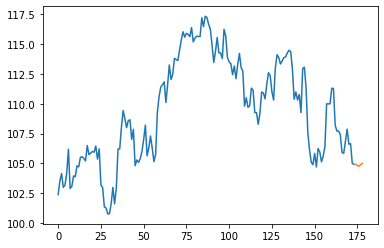

In [60]:
# two step forecast
forecasting = model_.forecast(steps=5)
forecast_vals = forecasting[0]
# reshape the arrays to have the same length
preds = np.zeros(len(X)+len(forecast_vals))
preds[-len(forecast_vals):] = forecast_vals
preds[preds==0] = np.NaN
# plot them on top of each other
plt.plot(X)
plt.plot(preds)

In [19]:
test_set = pd.read_csv(os.path.join(TICKER_DIR, "MA_BAP.csv"))
test_set = test_set.dropna(how="any")
test_X = test_set["close"].values
scores = evaluate_models(test_X, [0, 1, 2, 4, 6], range(3), range(3))
best_score = sorted(scores)[0]
print(f"BEST SCORE: {best_score[1]}\tORDER: {best_score[0]}")

ARIMA ORDER: (0, 0, 0)	MSE: 24.255697687464668
ARIMA ORDER: (0, 0, 1)	MSE: 20.235473139358337
ARIMA ORDER: (0, 0, 2)	MSE: 11.569009069800726
ARIMA ORDER: (0, 1, 0)	MSE: 11.55387105137444
ARIMA ORDER: (0, 1, 1)	MSE: 11.318783247425133
ARIMA ORDER: (0, 1, 2)	MSE: 11.159231129190376
ARIMA ORDER: (0, 2, 0)	MSE: 28.367719427803777
ARIMA ORDER: (0, 2, 2)	MSE: 11.4947460003414
ARIMA ORDER: (1, 0, 0)	MSE: 10.728317874294584
ARIMA ORDER: (1, 0, 1)	MSE: 10.709213676523477
ARIMA ORDER: (1, 2, 0)	MSE: 15.097289937399069
ARIMA ORDER: (1, 2, 1)	MSE: 11.452162467055135
